# **HOUSE RENT PREDICTION**

## *Analisis exploratorio de los datos*

1. Comprension del conjunto de datos
2. Analisis Univariante: *Rent Price*
3. Analisis Multivariante
4. Limpieza y Conversion de los datos
5. Hipotesis estadisticas

### *Comprension del conjunto de datos*

En este Conjunto de datos, tenemos informacion de mas de 4700 Casas/Apartamentos/Pisos dispoibles por renta con diferentes parametros como BHK, Renta, Tamaño, Numero de pisos, tipo de Area, Localidad, Ciudad, Estatus de mobiliario, Numero de baños y Punto de contacto

* BHK: Numero de Habitaciones, Hall, Cocina.
* Rent: Alquiler de la vivienda. 
* Size: Tamaño de la vivienda en metros cuadrados
* Floor: Casas/Apartamentos/Pisos situados en los que Planta y Número Total de Plantas (Ejemplo: Planta 1 de 2, 3 de 5, etc.)
* Area Type: Tamaño de las Casas/Apartamentos/Piso calculado en Súper Área, Área de Periferia o Área Construida.
* Area Locality: Localidad de la vivienda.
* City: Ciudad en la que esta situada la vivienda.
* Furnishing Status: Vivienda amueblada, semi-amueblada o sin amueblar.
* Tenant Preferred: Tipo de inquilino preferido.
* Bathroom: Numero de baños.
* Point of Contact: A quién debe contactar para obtener más información sobre las Casas/Apartamentos/Piso.

In [23]:
import pandas as pd
import numpy as np

data=pd.read_csv("/home/ruben/Escritorio/Projects/House Rent Prediction/House_Rent_Dataset.csv")
data.sample(5)


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
3172,2022-05-01,2,10000,898,7 out of 14,Super Area,Kalavakkam,Chennai,Semi-Furnished,Family,2,Contact Owner
3266,2022-06-06,2,11000,1200,1 out of 1,Carpet Area,"Tambaram West, Tambaram, Chennai Bypass Road",Chennai,Unfurnished,Bachelors,2,Contact Owner
2249,2022-06-04,2,11000,600,1 out of 3,Super Area,K R Puram,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
1656,2022-05-23,2,15000,800,1 out of 4,Super Area,J P Nagar,Bangalore,Furnished,Bachelors/Family,1,Contact Owner
2817,2022-07-06,3,30000,900,3 out of 4,Carpet Area,"Arjun Nagar, Safdarjung Enclave",Delhi,Semi-Furnished,Bachelors,3,Contact Agent


In [24]:
data.shape

(4746, 12)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [26]:
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [27]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [28]:
data.duplicated().sum()

0

In [84]:
from turtle import width
import plotly.express as px
fig = px.sunburst(data, path=['City', 'Area Type', 'Furnishing Status', 'Tenant Preferred'], width=800, height=800,title='Reparto de viviendas según variables categoricas',color_discrete_sequence=px.colors.cyclical.Phase)
fig.show()



### *Analisis Univariante: Rent Price*

In [30]:
%%capture
import pip
pip.main(["install","matplotlib"])
pip.main(["install","seaborn"])
pip.main(["install","statsmodels"])
pip.main(["install","scipy"])
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import statsmodels.api as sm 
from scipy import stats

In [31]:
data['Rent'].describe()

count    4.746000e+03
mean     3.499345e+04
std      7.810641e+04
min      1.200000e+03
25%      1.000000e+04
50%      1.600000e+04
75%      3.300000e+04
max      3.500000e+06
Name: Rent, dtype: float64

/tmp/ipykernel_4109/2382517407.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




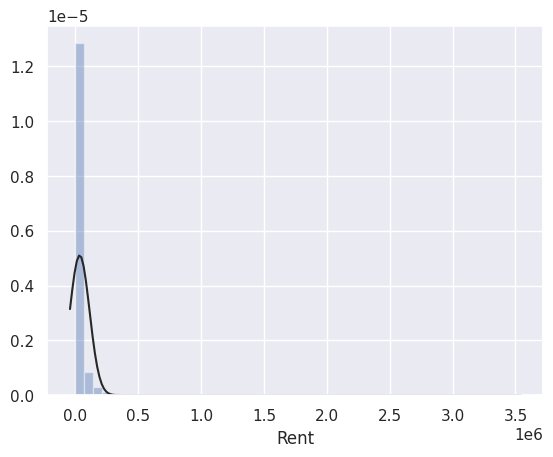

In [32]:
from scipy.stats import norm
ax = sns.distplot(data['Rent'], fit=norm, kde=False)

Podemos observar: 
* La presencia de outliers
* Asimetria positiva
* Desviacion respecto de distribucion normal

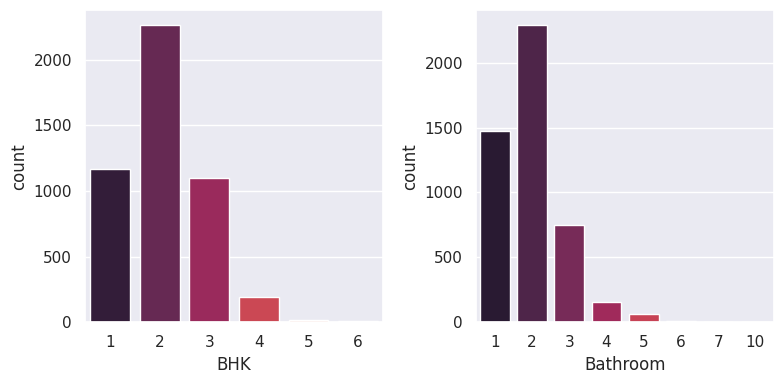

In [33]:
#Relacion con variables numericas
color='rocket'
f, axs = plt.subplots(1,2,figsize=(8,4))
sns.countplot(ax=axs[0], x='BHK',data=data, palette=color)
sns.countplot(ax=axs[1],x='Bathroom', data=data, palette=color)
f.tight_layout()

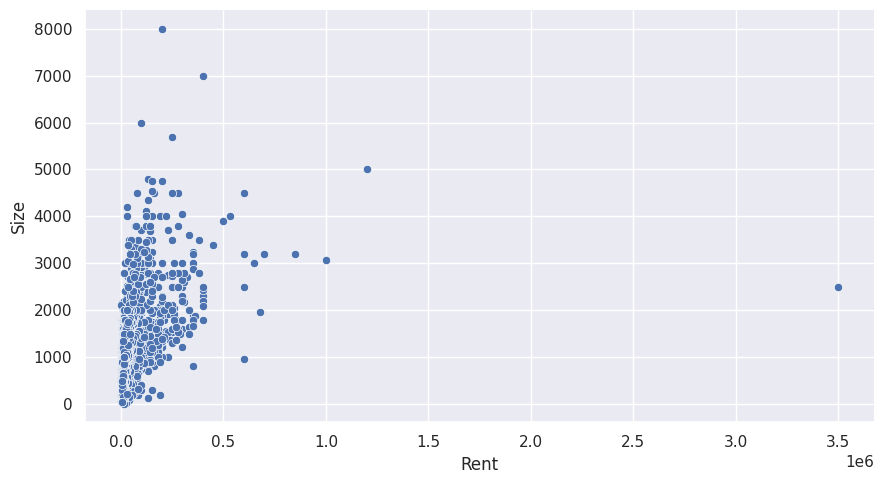

In [34]:
sns.relplot( data=data, x='Rent', y='Size', aspect=1.8)

Este analisis refuerza la idea de la presencia de outliers que distorsian graficamente las relaciones entre las distintas variables

In [35]:
#Eliminacion de outliers mediante el metodo de IQR

Q1 = np.percentile(data['Rent'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data['Rent'], 75, interpolation = 'midpoint')
 
IQR = Q3-Q1

print("Old Shape:", data.shape)

#Upper bound
upper= np.where(data['Rent'] >= (Q3+1.5*IQR))
#Lower bounf
lower= np.where(data['Rent'] <= (Q1-1.5*IQR))

data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)



print("New Shape:", data.shape)

Old Shape: (4746, 12)
New Shape: (4226, 12)


/tmp/ipykernel_4109/2635675497.py:3: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)

/tmp/ipykernel_4109/2635675497.py:4: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)



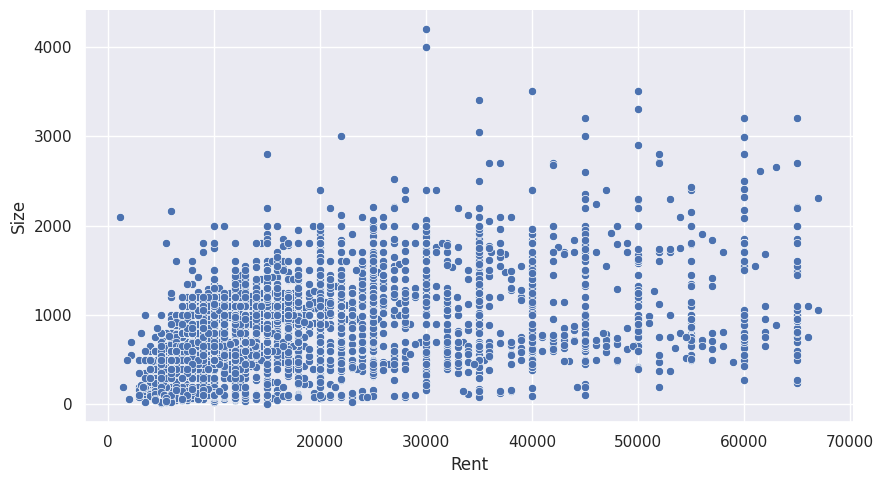

In [36]:
sns.relplot( data=data, x='Rent', y='Size', aspect=1.8)

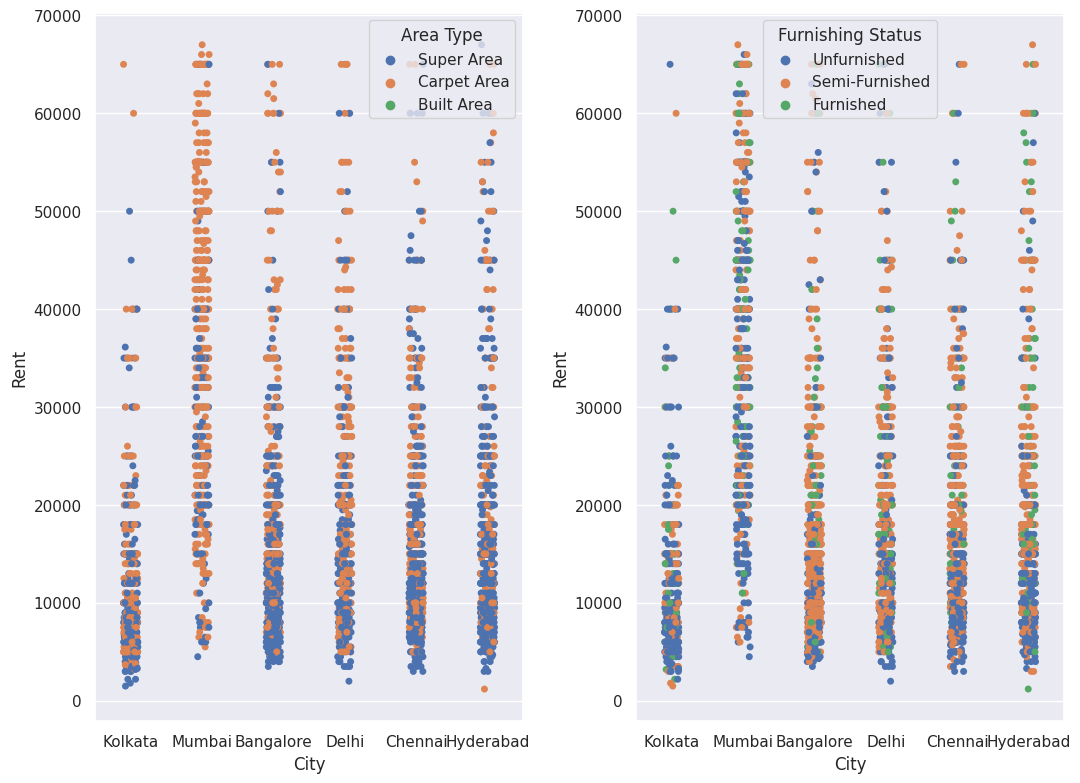

In [86]:
#Relacion con variables categoricas
f, axs = plt.subplots(1,2,figsize=(11,8))
sns.stripplot(ax=axs[0],data=data, x='City', y='Rent', hue='Area Type')
sns.stripplot(ax=axs[1],data=data, x='City', y='Rent', hue='Furnishing Status')
f.tight_layout()

Como se puede observar: 
* Existe cierta tendencia a agrupaciones de la variable 'Area Type' dependiendo el rango que tome la variable 'Rent'
* No existe una agrupacion tan clara de la variable 'Furnishing Status' en relacion con la variable 'Rent'
* Analizamos solamente las varibales mas relevantes para el contexto dado, quedarian pues variables libres de analisis

## *Analisis Multivariante de Datos*

De cara a observar las relaciones entre todas las variables, es necesario realizar el analisis multivariante con el objetivo de hacer un estudio mas completo y objetivo. En concreto utilizaeremos para el estudio de las correlaciones la matriz de correlacion de Pearson, previa implementacion de variables ficticias.

In [38]:
data_category = data.select_dtypes(include='object')
data_category = data_category.drop(['Posted On','Area Locality','Floor'], axis=1)

col=data_category.columns
data_dummies = pd.get_dummies(data, columns=col, drop_first=True)
data_dummies.head()

,Posted On,BHK,Rent,Size,Floor,Area Locality,Bathroom,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2022-05-18,2,10000,1100,Ground out of 2,Bandel,2,0,1,0,0,0,1,0,0,1,1,0,0,1
1,2022-05-13,2,20000,800,1 out of 3,"Phool Bagan, Kankurgachi",1,0,1,0,0,0,1,0,1,0,1,0,0,1
2,2022-05-16,2,17000,1000,1 out of 3,Salt Lake City Sector 2,1,0,1,0,0,0,1,0,1,0,1,0,0,1
3,2022-07-04,2,10000,800,1 out of 2,Dumdum Park,1,0,1,0,0,0,1,0,0,1,1,0,0,1
4,2022-05-09,2,7500,850,1 out of 2,South Dum Dum,1,1,0,0,0,0,1,0,0,1,0,0,0,1


<AxesSubplot:>

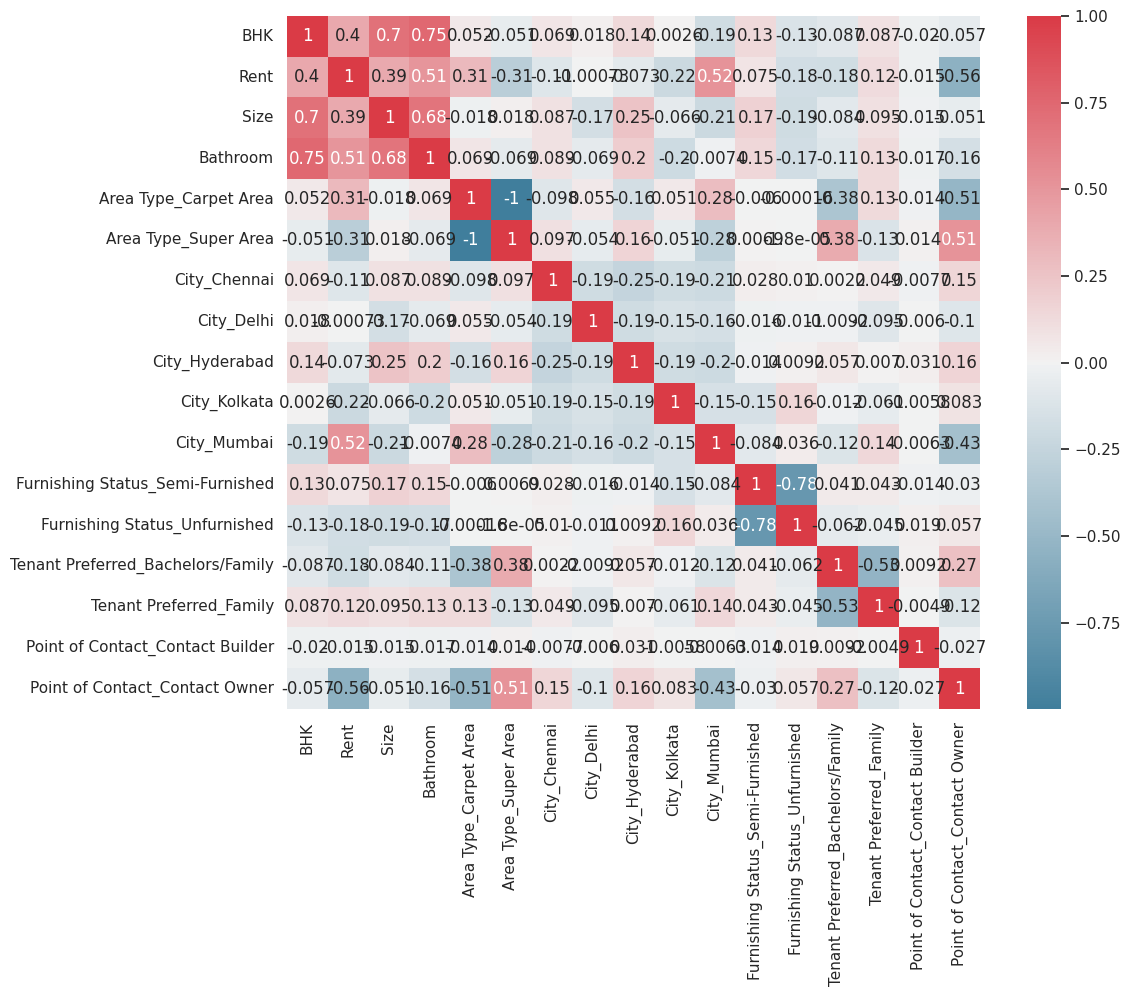

In [39]:
cmap = sns.diverging_palette(230, 10, as_cmap=True)

corrmat = data_dummies.corr()
f, axs = plt.subplots(figsize=(12,9))
sns.heatmap(
    data=corrmat, 
    vmax=1, 
    cmap=cmap,
    square=True, 
    annot=True, 
)


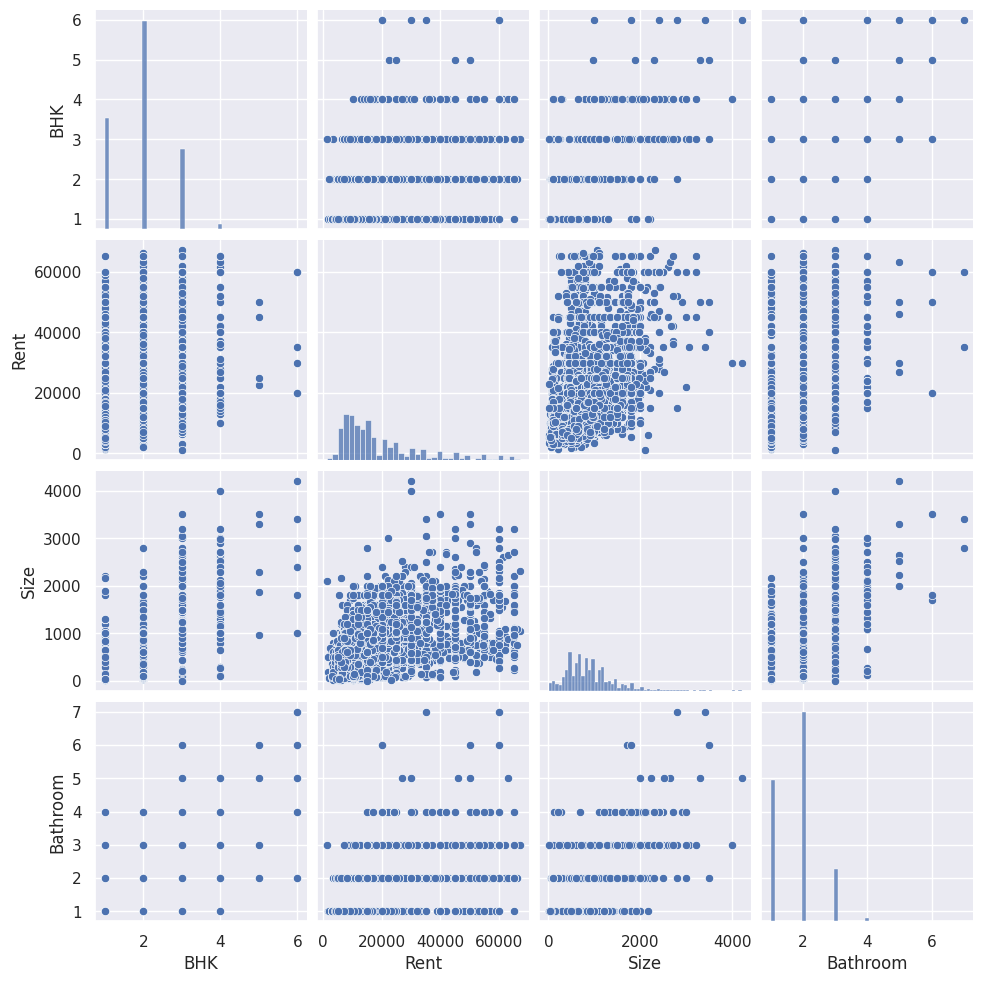

In [40]:
sns.set()
cols = data.columns
sns.pairplot(data[cols], height = 2.5)
plt.show();

## *Limpieza y conversion de los datos*

* Eliminacion de Outliers ✅
* Implementacion de variables ficticias ✅
* Transformacion logaritmica de la variable *'Rent'* ❗

In [41]:
#Realizamos la transformacion logaritmica de la variable 'Rent' debido a que como hemos podido observar en el histograma de esta misma variable encontramos la presencia de no normalidad, ademas de un sesgo positivo hacia el interior del eje
data_log= data.copy()
data_log['Rent'] = np.log(data_log['Rent'])

data_log.head()


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,9.210340,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,9.903488,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,9.740969,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,9.210340,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,8.922658,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


## *Hispotesis estadisticas*

* Contraste de Normalidad
* Supuesto de Homocedasticidad
* Linealidad 

### *Normalidad de la variable de estudio*

Kursotis: -0.5117913696731389
Skewness: 0.18405102741384977
Valores optimos entre -1 y 1


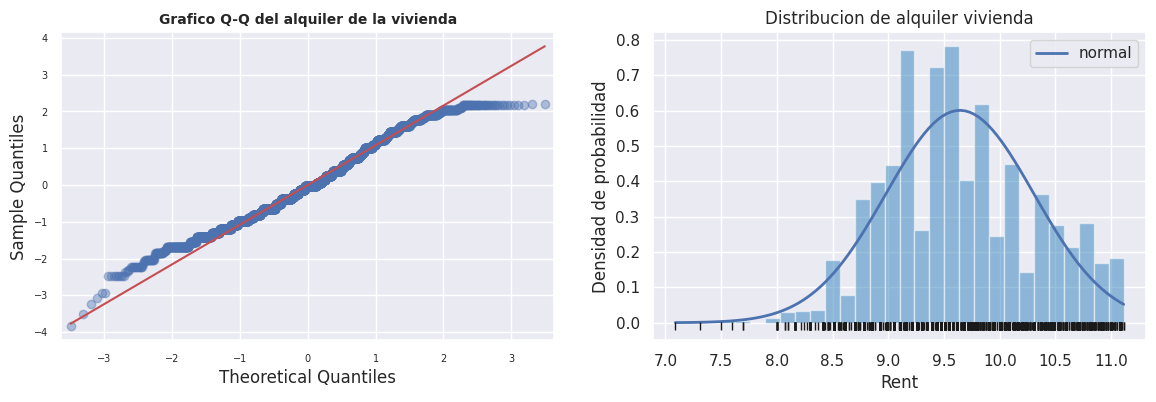

In [87]:
rent=data_log["Rent"]

fig,ax = plt.subplots(1,2,figsize=(14,4))
sm.qqplot(rent, fit= True, line  = "q", alpha = 0.4, lw= 2, ax= ax[0])
ax[0].set_title("Grafico Q-Q del alquiler de la vivienda", fontsize = 10, fontweight ="bold")
ax[0].tick_params(labelsize = 7)

mu,sigma = stats.norm.fit(rent)

x_hat = np.linspace (min(rent),max(rent),num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

ax[1].plot(x_hat, y_hat, linewidth=2, label="normal")
ax[1].hist(x=rent,density=True, bins=30,color="#3182bd",alpha=0.5)
ax[1].plot(rent, np.full_like(rent, -0.01), '|k', markeredgewidth=1)
ax[1].set_title("Distribucion de alquiler vivienda")
ax[1].set_xlabel("Rent")
ax[1].set_ylabel("Densidad de probabilidad")
ax[1].legend()


print("Kursotis:", stats.kurtosis(rent))
print("Skewness:", stats.skew(rent))
print("Valores optimos entre -1 y 1")

* Como podemos observar, una vez eliminados los outliers y realizando una transformacion de la variable de analisis a escala logaritmica, podemos concluir con la existencia de normalidad de la variable tanto a nivel visual como a nivel analitico mediante los estadisticos de *Kurtosis* y *Skewness*

* Aun con ello, podemos observar como siguen existiendo ciertos picos en la densidad de probabilidad


### *Homocedasticidad del conjunto de datos*

El supuesto de homocedasticidad considera que la varianza es constante. cuando la condicion de homocedasticidad no se cumple, se considera que el termino contiene heterocedasticidad. El mejor metodo para probar la homocedasticidad para dos variables metricas es de forma grafica 

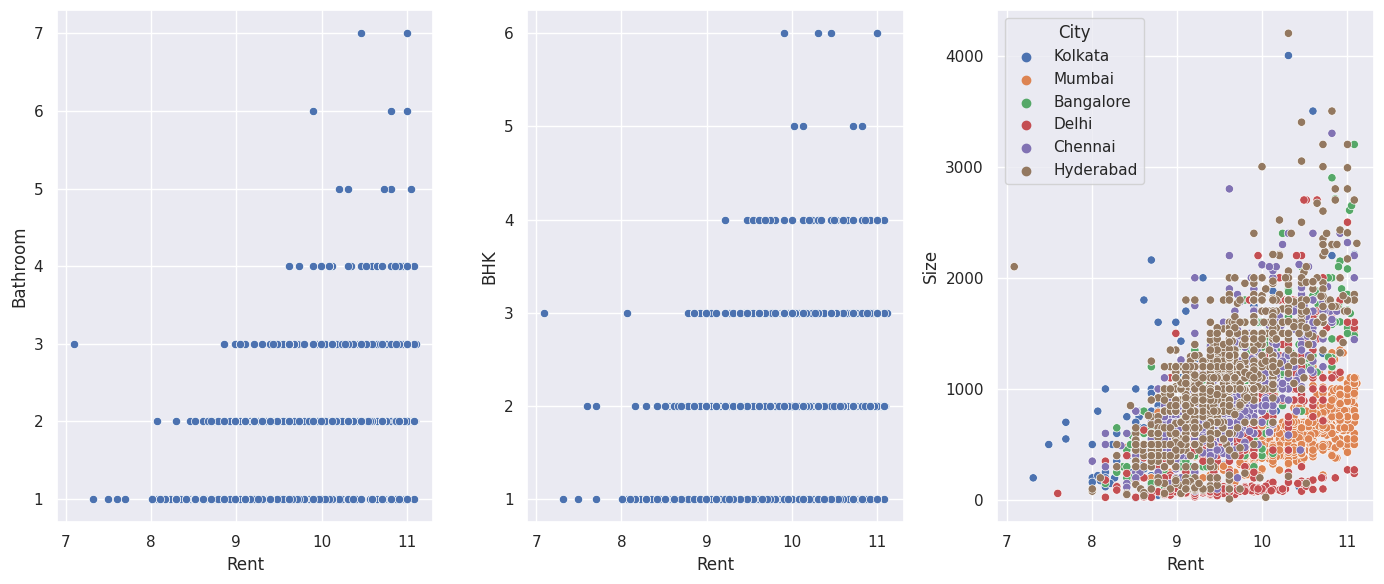

In [45]:
f,axs = plt.subplots(1,3,figsize=(14,6))
sns.scatterplot(data=data_log, x='Rent', y='Bathroom', ax=axs[0])
sns.scatterplot(data=data_log, x='Rent', y='BHK', ax=axs[1])
sns.scatterplot(data=data_log, x='Rent', y='Size', ax=axs[2], hue='City')

f.tight_layout()

Como se puede observar, aplicando la transformacion de datos a escala logaritmica reducimos la forma conica del diagrama de dispersion, por lo que a priori podemos decir que resolvemos en cierta medida el problema de la heterocedasticidad

### *Linealidad*

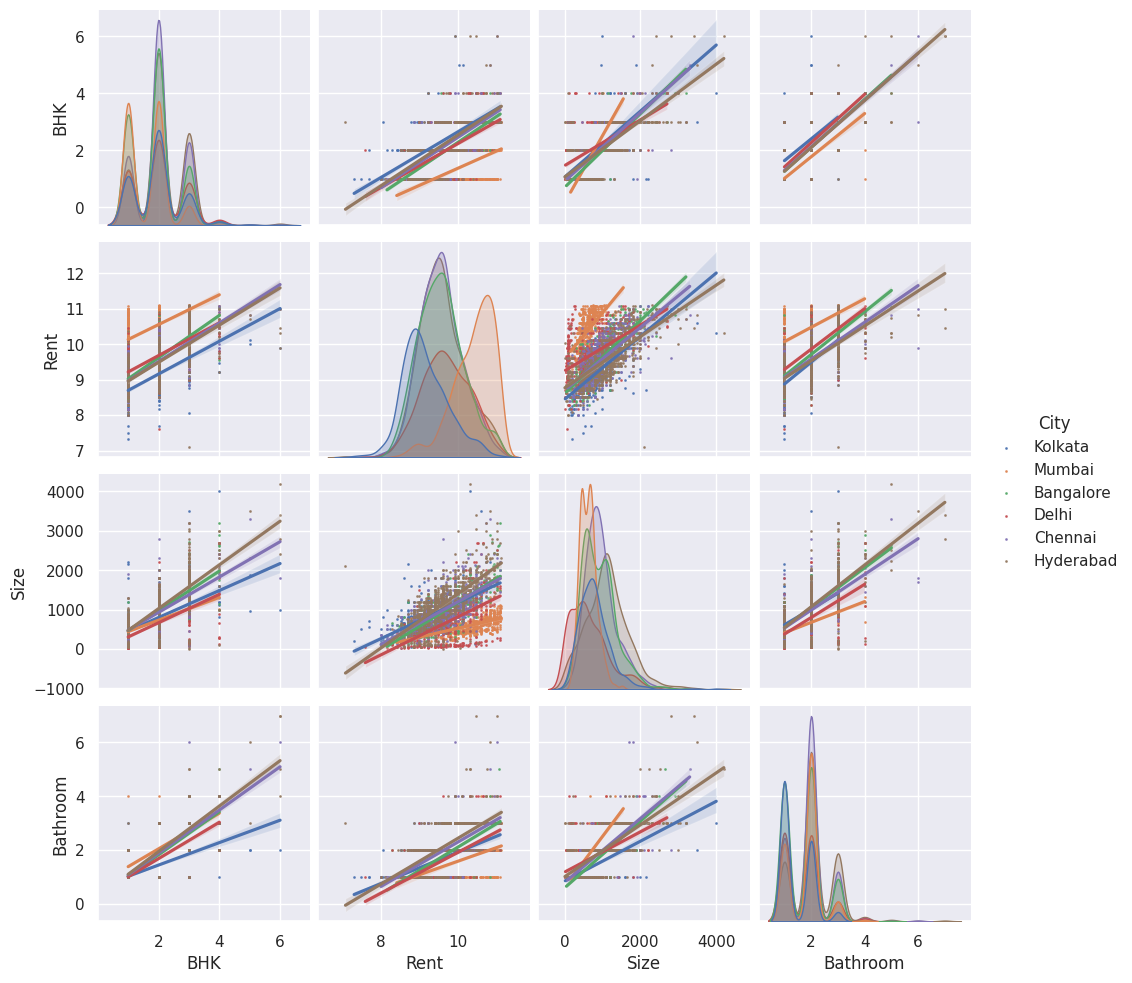

In [82]:
from matplotlib import markers
from numpy import size


sns.set()
cols = data_log.columns
sns.pairplot(data_log[cols], height = 2.5, hue='City', kind='reg',plot_kws=dict(scatter_kws=dict(s=1)) )
plt.show();

Como podemos observar, dentro de las variables metricas que existen en el conjunto de datos, todas cumplen la hipotesis de linealidad, por lo que podemos concluir que el conjunto de datos cumple las 3 principales hipotesis expuestas. 